# CUSTOMER SEGMENTATION

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

The dataset for this project can be found in this link www.kaggle.com/datasets

The dataset constitutes of 22 features and 8067 attributes

- ID: Unique ID
- Gender: Gender of the customer
- Ever_Married: Marital status of the customer
- Age: Age of the customer
- Graduate: Is the customer a graduate?
- Profession: Profession of the customer
- Work_Experience: Work Experience in years
- Spending_Score: Spending score of the customer
- Family_Size: Number of family members for the customer (including the customer)
- Var_1: Anonymised Category for the customer
- Segmention: (target) Customer Segment of the customer

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# Import the dataset

train = pd.read_csv("C:\\Users\\User\\Desktop\\ML by me\\datasets\\customer-seg-classification\\Train.csv")
test = pd.read_csv("C:\\Users\\User\\Desktop\\ML by me\\datasets\\customer-seg-classification\\Test.csv")

# EXPLORE THE DATA

In [3]:
# Peak at the train dataset
train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# Peak at the train dataset
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
# Lets take a look at the features and their datatype
# There are about 8068 total entries of data. Features with less than this number have missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [7]:
# The describe function gives a basic statistical overview of the data
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [9]:
# Lets drop the ID and var_1 features as it isn't relevant to our work

train.drop(["ID", "Var_1"], axis=1, inplace=True)
test.drop(["ID", "Var_1"], axis=1, inplace=True)

In [10]:
train.groupby(['Segmentation']).mean()

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.924949,2.874578,2.439531
B,48.200215,2.378151,2.696970
C,49.144162,2.240771,2.974559
D,33.390212,3.021717,3.232624


In [11]:
test.groupby(['Segmentation']).mean()

,Age,Work_Experience,Family_Size
Segmentation,,,
A,43.174941,2.700528,2.877778
B,45.996364,2.463710,2.686907
C,49.743644,2.314149,2.653333
D,38.689065,2.598253,2.973865


### VISUALIZING MISSING VALUES WITH MSNO

The barplot from the missingno library provides a simple plot where each bar represents a column within the dataframe. The 
height of the bar indicates how complete that column is, i.e, how many non-null values are present.

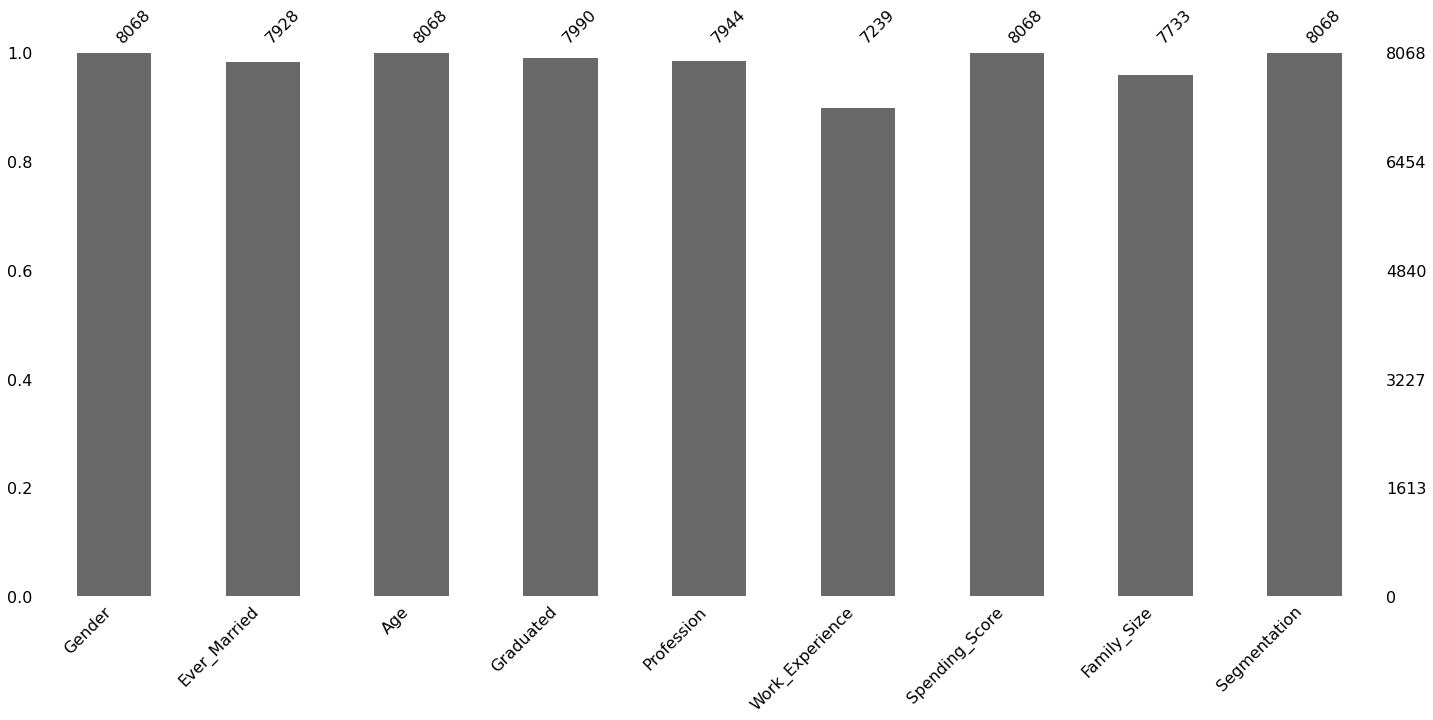

In [12]:
# From train the barplot, the work_experience has the most number of missing values

msno.bar(train)

In [13]:
# Check if the missing values for each feature is > 20%, in which case we might consider deleting the 
# entire columns instead of replaing with mean, median or mode

train.isnull().mean()*100

Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Segmentation        0.000000
dtype: float64

In [14]:
# Using Sklearn to impute missing values

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
imp_result = imp.fit_transform(train)
train = pd.DataFrame(imp_result, columns=train.columns)
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1,Low,4,D
1,Female,Yes,38,Yes,Engineer,1,Average,3,A
2,Female,Yes,67,Yes,Engineer,1,Low,1,B
3,Male,Yes,67,Yes,Lawyer,0,High,2,B
4,Female,Yes,40,Yes,Entertainment,1,High,6,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0,Low,7,D
8064,Male,No,35,No,Executive,3,Low,4,D
8065,Female,No,33,Yes,Healthcare,1,Low,1,D
8066,Female,No,27,Yes,Healthcare,1,Low,4,B


In [15]:
# Confirm number of features and observations are same after missing value imputation
print(train.shape)
print(train.isna().sum())
# Check that the data types are still the same 
print(train.info())

(8068, 9)
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           8068 non-null   object
 1   Ever_Married     8068 non-null   object
 2   Age              8068 non-null   object
 3   Graduated        8068 non-null   object
 4   Profession       8068 non-null   object
 5   Work_Experience  8068 non-null   object
 6   Spending_Score   8068 non-null   object
 7   Family_Size      8068 non-null   object
 8   Segmentation     8068 non-null   object
dtypes: object(9)
memory usage: 567.4+ KB
None


In [16]:
# Lets convert the the numerical variables ; Age, Working_Experience and Family_Size from object back to numeric

train['Age'] = train[['Age']].astype(int)
train['Work_Experience'] = train[['Work_Experience']].astype(float)
train['Family_Size'] = train[['Family_Size']].astype(int)

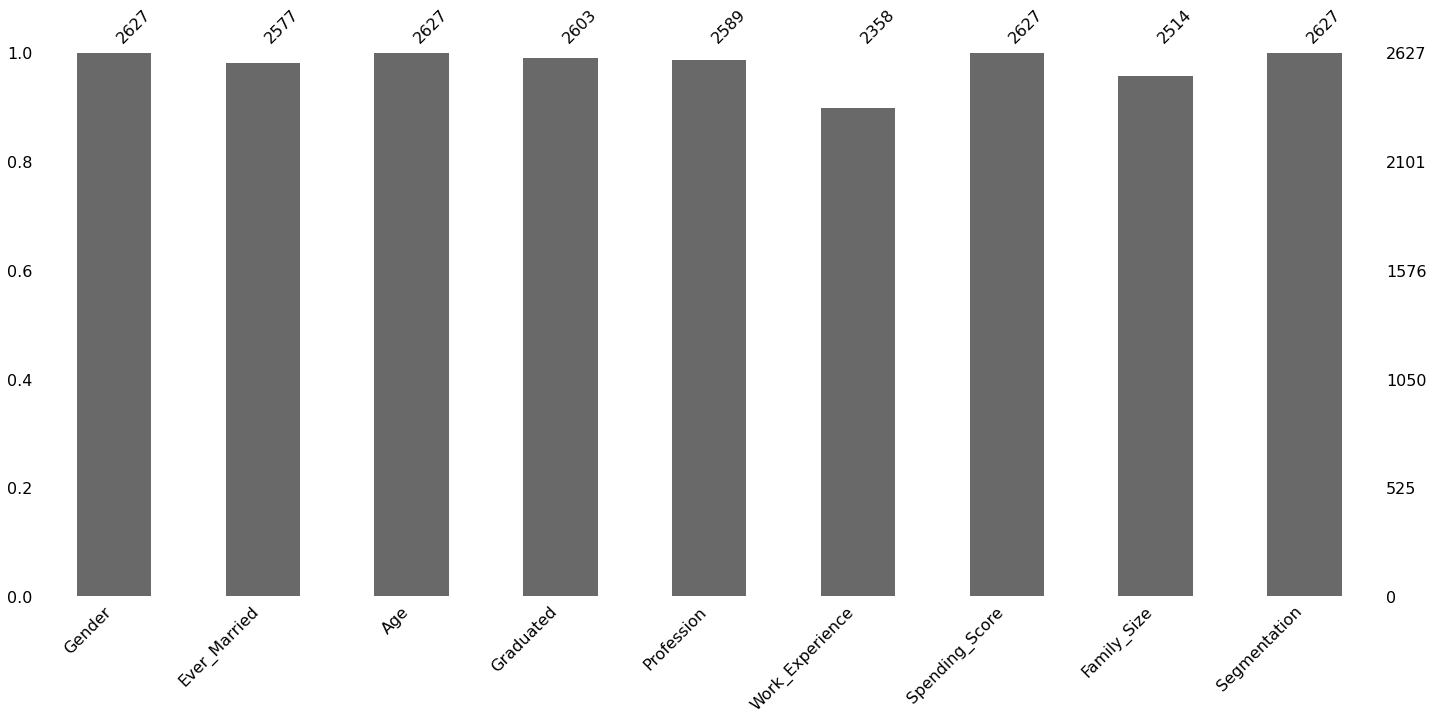

In [17]:
# MSNO for test data
# From test the barplot, the work_experience has the most number of missing values

msno.bar(test)

In [18]:
# Using Sklearn to impute missing values
imp_test_result = imp.fit_transform(test)
test = pd.DataFrame(imp_test_result, columns=train.columns)
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Female,Yes,36,Yes,Engineer,0,Low,1,B
1,Male,Yes,37,Yes,Healthcare,8,Average,4,A
2,Female,Yes,69,No,Artist,0,Low,1,A
3,Male,Yes,59,No,Executive,11,High,2,B
4,Female,No,19,No,Marketing,1,Low,4,A
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9,Low,4,B
2623,Female,No,35,Yes,Doctor,1,Low,1,A
2624,Female,No,53,Yes,Entertainment,1,Low,2,C
2625,Male,Yes,47,Yes,Executive,1,High,5,C


In [19]:
print(test.shape)
print(test.isna().sum())
print(test.info())

(2627, 9)
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           2627 non-null   object
 1   Ever_Married     2627 non-null   object
 2   Age              2627 non-null   object
 3   Graduated        2627 non-null   object
 4   Profession       2627 non-null   object
 5   Work_Experience  2627 non-null   object
 6   Spending_Score   2627 non-null   object
 7   Family_Size      2627 non-null   object
 8   Segmentation     2627 non-null   object
dtypes: object(9)
memory usage: 184.8+ KB
None


In [20]:
# Lets convert the the numerical variables ; Age, Working_Experience and Family_Size from object back 
# to numeric

test['Age'] = test[['Age']].astype(int)
test['Work_Experience'] = test[['Work_Experience']].astype(float)
test['Family_Size'] = test[['Family_Size']].astype(int)

# VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B97B27B7C0>,
      dtype=object)

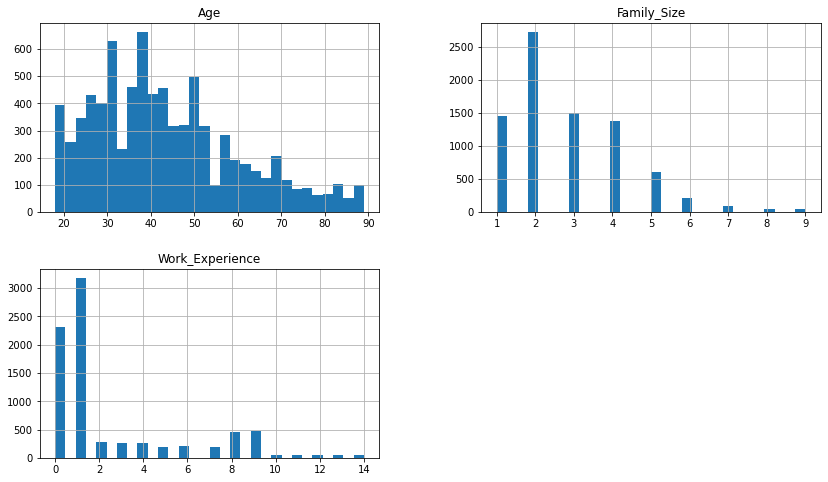

In [21]:
# Produce a histogram for each Numerical feature in the train data

train.hist(figsize=(14,8),
          bins=30)

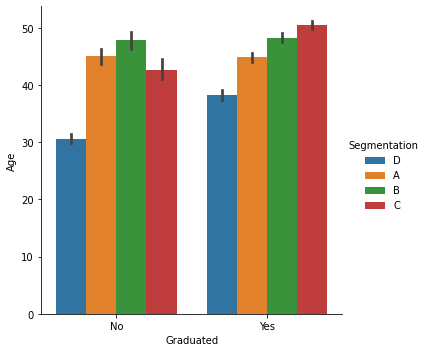

In [22]:
# Visualize the average age of graduates vs non-graduates in each segment
sns.catplot(x ='Graduated',
            y='Age',
            hue ='Segmentation',
            kind= 'bar',
            data = train)

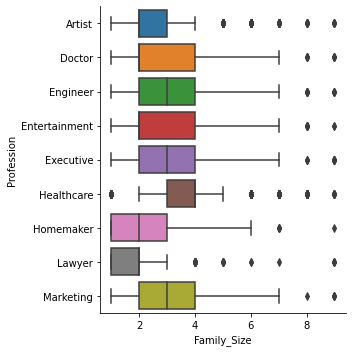

In [23]:
# Use boxplot to understand the level of outliers present in the data
sns.catplot(x="Family_Size",
            y="Profession",
            kind="box",
            data=train.sort_values("Profession"))

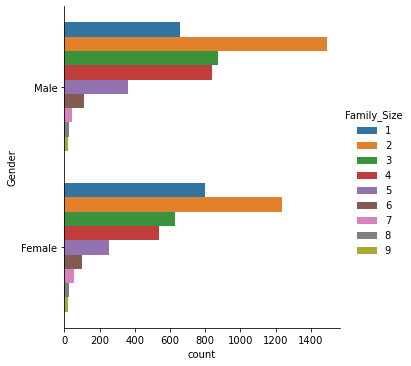

In [24]:
# Visualize the most occuring family size
# From the plot, a family size of two is the most common

sns.catplot(y = 'Gender', 
           hue = 'Family_Size',
           kind = 'count',
           data = train)

# PREPROCESSING

In [25]:
# Encode the train data and then standardize the dataset using standard scaler

x_trained = train.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_trained)

# KMEANS
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia

### ELBOW METHOD
This method is used to find the optimal number of cluster.

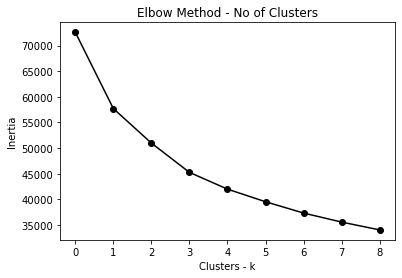

In [26]:
# The optimal number of cluster could be anywhere between 2-3: The inertia drops quickly as we 
# increase k up to 3 and decreases much more slowly as we keep increasing k

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_scaled)
                for k in range(1, 10)]
           
k_inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.plot(k_inertias, 'bo-', color='black')
plt.title('Elbow Method - No of Clusters')
plt.xlabel('Clusters - k')
plt.ylabel('Inertia')
plt.show()

### SILHOUETTE COEFFICIENT
The silhouette coefficient can vary between -1 and +1
- A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters.
- A coefficient close to 0 means that it is close to a cluster boundary.
- A coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [27]:
# A more precise approach for finding the optimal number of clusters

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(x_scaled)
silhouette_score(x_scaled, kmeans.labels_)

0.20571329618629428

In [28]:
silhouette_scores = [silhouette_score(x_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]
silhouette_scores

[0.2069589832969264,
 0.18286986960966356,
 0.20571329618629428,
 0.20092867378030815,
 0.19136794831546605,
 0.1879245071702235,
 0.18211417268564958,
 0.18457938618468753]

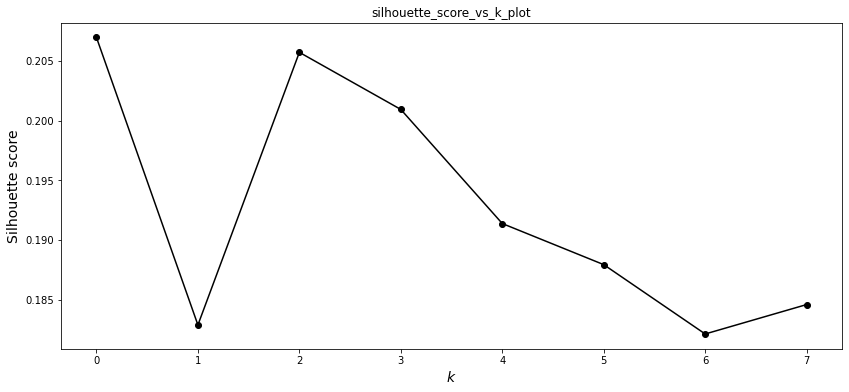

In [29]:
# Generally, the higher the Silhouette score, the better defined your clusters are.
# From the plot below, the optimal number of cluster for our dataset would be '2'

plt.figure(figsize=(14, 6))
plt.plot(silhouette_scores, "bo-", color='black')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("silhouette_score_vs_k_plot")
plt.show()

In [30]:
# Let's visualize our dataset to understand what it looks like
# Create a PCA instance: pca
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

[0.25876473 0.15472179 0.13188427]


Text(0, 0.5, 'PCA 2')

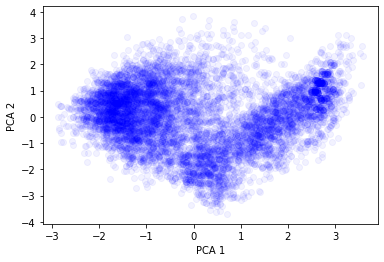

In [31]:
# The figure shows atleast 'two' distinguishable clusters
plt.scatter(PCA_components[0], PCA_components[1], alpha=.05, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# DBSCAN
- This algorithm views clusters as continuous regions of high density separated by regions of low    density.
- Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. 
- The scatterplot above implies that our data is not particularly convex but might have other shapes that KMeans is not robust to

In [32]:
# Initialize the model and fit the data

dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(x_scaled)

DBSCAN(eps=0.1, min_samples=10)

In [33]:
labels = dbscan.labels_
print(labels)
# Number of clusters in labels.
n_clusters_ = len(set(labels))

[ 0 -1 -1 ... -1 -1 -1]


In [34]:
# Silhouette score bound between -1 indicates incorrect clustering
# Estimated number of clusters is also higher than what we hoped for

print("Estimated number of clusters: %d" % n_clusters_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_scaled, labels))

Estimated number of clusters: 10
Silhouette Coefficient: -0.102


Text(0, 0.5, '$x_2$')

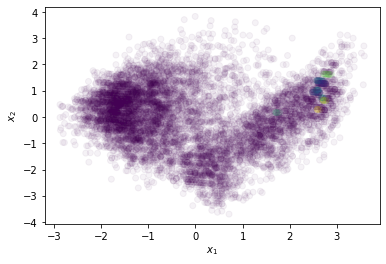

In [35]:
# Visualizing DBSCAN
plt.scatter(PCA_components[0],
            PCA_components[1],
            alpha=0.05,
            c=labels,
            label = train.Segmentation)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

0.6433896042472619


<Figure size 360x360 with 0 Axes>

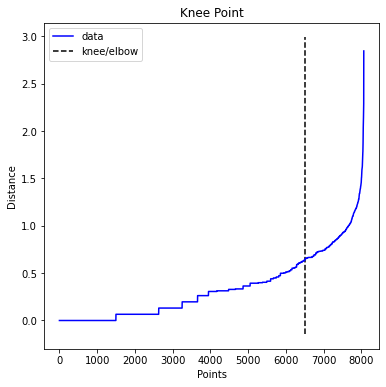

In [36]:
# Lets try the elbow method to get the optimal number of 'epsilon (eps)'

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_scaled)
distances, indices = nbrs.kneighbors(x_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', 
                   interp_method='polynomial')

# The knee plot would help us locate the area of maximum curvature which is the optimal number for eps
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [37]:
# Intialize DBSCAN with the accurate eps

dbscan = DBSCAN(eps=0.643, min_samples=10)
dbscan.fit(x_scaled)

labels = dbscan.labels_
print(labels)
# Number of clusters in labels.
n_clusters_ = len(set(labels))

print("Estimated number of clusters: %d" % n_clusters_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_scaled, labels))

[ 0 -1 -1 ... 65 -1 36]
Estimated number of clusters: 114
Silhouette Coefficient: -0.215


The DBSCAN is performing poorly.
The estimated number of cluster is very high and the negative silhouette score indicates incorrect 
clustering. Let's try a distribution based clustering algorithm.

# GAUSSIAN MIXTURE MODEL (GMM)
Gaussian Mixture Models assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In [38]:
# Initialize and fit model
# Create an empty list for silhouette scores
S=[]
# Range of clusters to try
K=range(2,11)
for k in K:
    gmodel = GaussianMixture(n_components=k, n_init=20, init_params='kmeans') 
    labels = gmodel.fit_predict(x_scaled)
    # Calculate the Silhoutte Score and append to list
    S.append(silhouette_score(x_scaled, labels, metric='euclidean'))

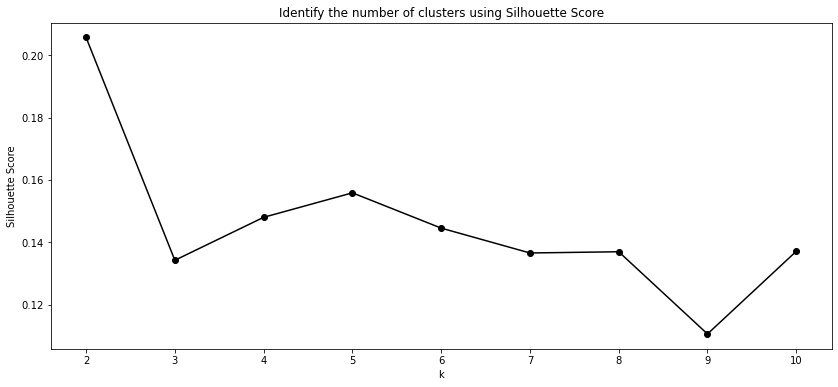

In [39]:
# Plot the resulting Silhouette scores
# The optimal number of plot for our data would be '2'

plt.figure(figsize=(14,6))
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [40]:
# Lets check if our model actually converged
gmodel.converged_

True

In [41]:
# Initialize gmm with the correct mixture component
gmodel = GaussianMixture(n_components=2, n_init=20, init_params='kmeans') 
# fit and predict
labels = gmodel.fit_predict(x_scaled)
labels

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

Text(0, 0.5, '$x_2$')

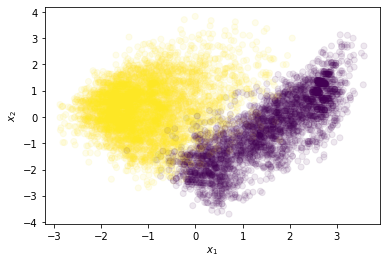

In [42]:
# Visualize GMM
plt.scatter(PCA_components[0],
            PCA_components[1],
            alpha=0.09,
            c=labels,
            label = train.Segmentation)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

The next step would be to apply the best performing model to the test data.
KMeans and GMM performed well. 

# APPLY KMEANS

In [43]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(x_scaled)
labels = kmeans.labels_
labels

array([0, 1, 1, ..., 0, 0, 1])

In [44]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, 
                              columns = [train.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,-0.132040,-1.096393,-0.686596,-0.255564,0.184407,0.131513,0.748999,0.099886,0.301924
1,0.098744,0.819920,0.513460,0.191119,-0.137906,-0.098350,-0.560126,-0.074698,-0.225789


In [45]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                              columns = [train.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.48175,0.054171,12.644554,0.501738,3.215527,2.902375,1.995365,1.965527,1.905852
1,0.59662,0.995667,30.937175,0.717938,2.396447,2.151863,0.884749,1.702123,1.304809


In [46]:
# Merge the train data with the cluster labels
cluster_df = pd.concat([train, pd.DataFrame({'cluster': labels})], axis = 1) 
cluster_df.head(6)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4,D,0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3,A,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1,B,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2,B,1
4,Female,Yes,40,Yes,Entertainment,1.0,High,6,A,1
5,Male,Yes,56,No,Artist,0.0,Average,2,C,1


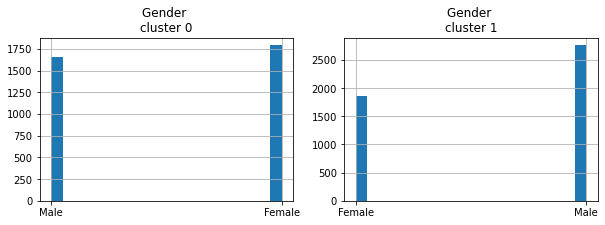

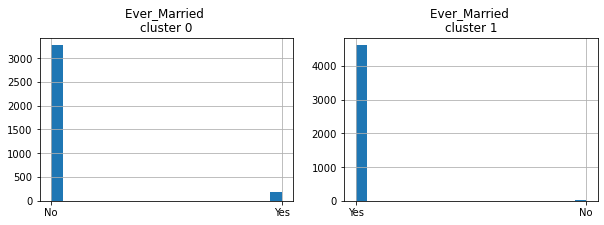

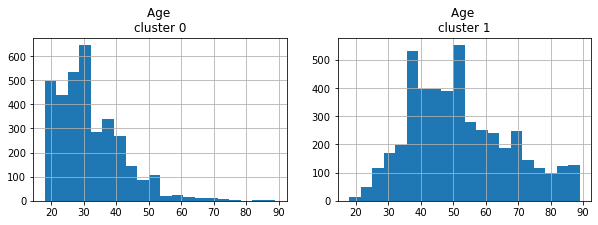

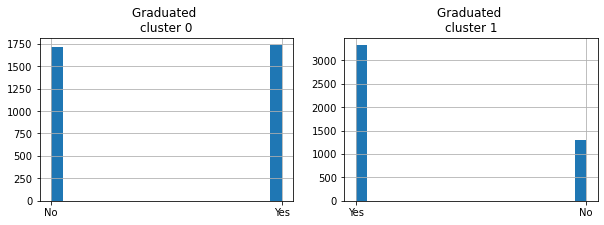

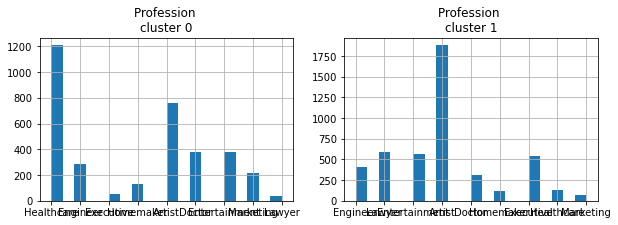

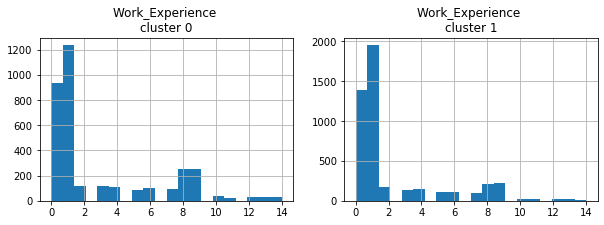

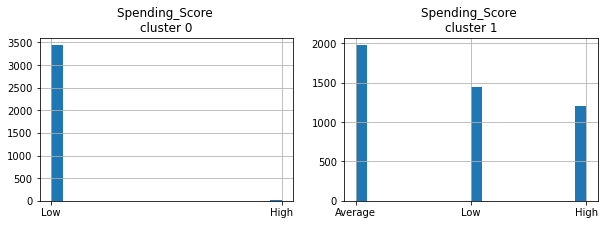

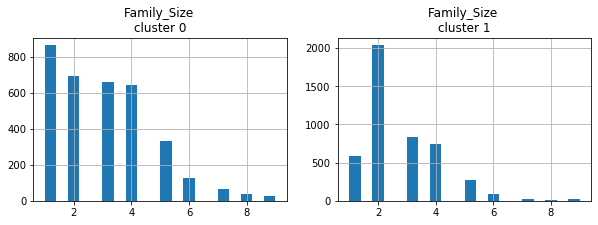

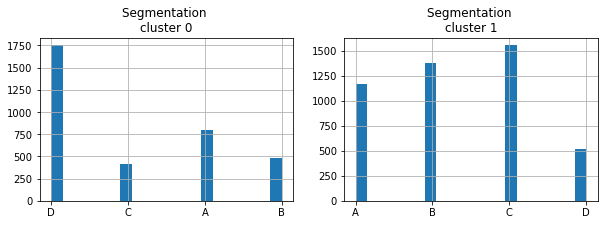

In [47]:
# Lets visualize the various clusters for each feature

for i in train.columns:
    plt.figure(figsize=(10,3))
    for r in range(2):
        plt.subplot(1,2, r+1)
        Cluster = cluster_df[cluster_df['cluster'] == r]
        Cluster[i].hist(bins = 20)
        plt.title('{} \ncluster {}'.format(i, r))
        
plt.show()    

# APPLY KMEANS TO TO TEST DATA

In [48]:
# Preprocess
x_test = test.apply(LabelEncoder().fit_transform)
x_test_scaled = scaler.fit_transform(x_test)

# Initialize and fit model
test_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
test_kmeans.fit(x_test_scaled)
test_labels = test_kmeans.labels_

test_cluster_centers = pd.DataFrame(data = test_kmeans.cluster_centers_, 
                              columns = [test.columns])

test_cluster_centers = scaler.inverse_transform(test_cluster_centers)
test_cluster_centers = pd.DataFrame(data = test_cluster_centers, 
                              columns = [test.columns])

test_cluster_df = pd.concat([test, pd.DataFrame({'cluster': test_labels})], axis = 1) 
test_cluster_df.head(6)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,cluster
0,Female,Yes,36,Yes,Engineer,0.0,Low,1,B,0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4,A,0
2,Female,Yes,69,No,Artist,0.0,Low,1,A,0
3,Male,Yes,59,No,Executive,11.0,High,2,B,0
4,Female,No,19,No,Marketing,1.0,Low,4,A,1
5,Male,Yes,47,Yes,Doctor,0.0,High,5,C,0


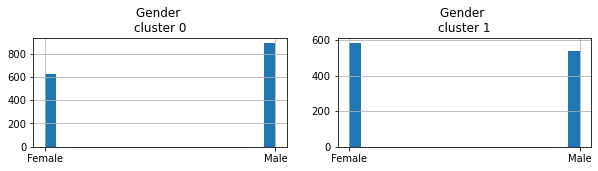

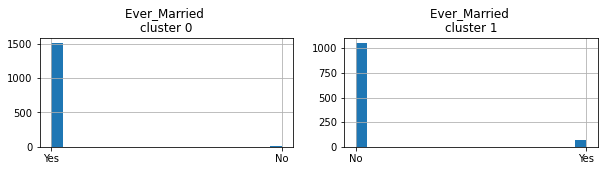

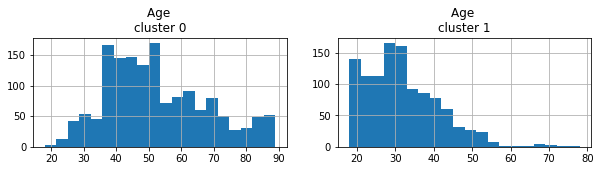

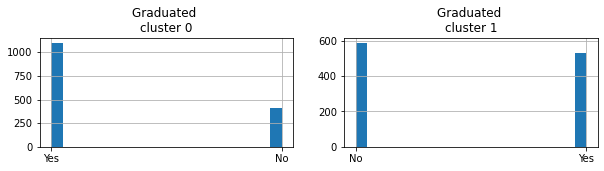

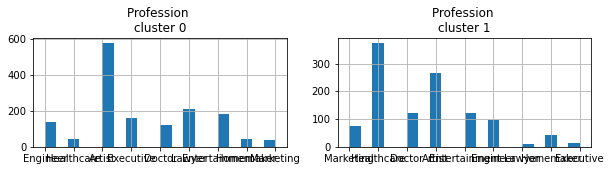

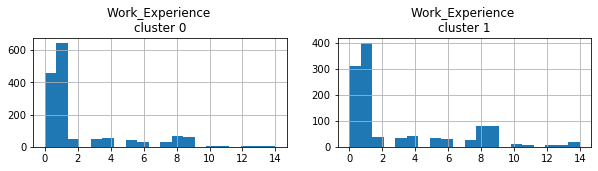

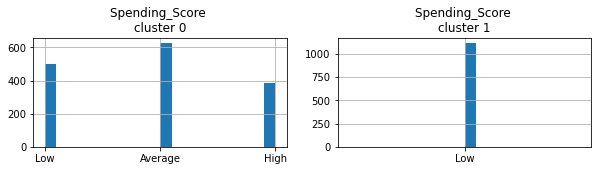

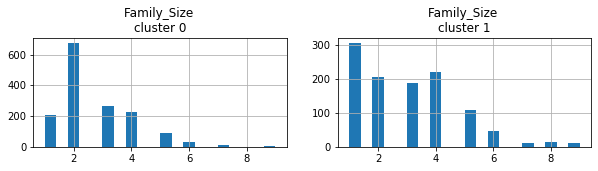

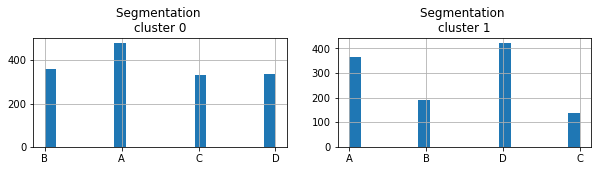

In [49]:
# Lets visualize the various clusters for each feature

for i in test.columns:
    plt.figure(figsize=(10,2))
    for r in range(2):
        plt.subplot(1,2, r+1)
        Cluster = test_cluster_df[test_cluster_df['cluster'] == r]
        Cluster[i].hist(bins = 20)
        plt.title('{} \ncluster {}'.format(i, r))
        
plt.show()    

([<matplotlib.patches.Wedge at 0x1b900198fd0>,
 [Text(0.606554608990982, -0.9176554398638942, 'A'),
  Text(-0.6616958433533188, 1.0010787236221437, 'B')],
 [Text(0.3308479685405356, -0.5005393308348514, '57.5%'),
  Text(-0.3859892419561026, 0.5839625887795838, '42.5%')])

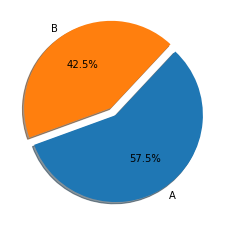

In [50]:
# Visualize the percentage of each cluster
# There are about 57.5% of new customers in cluster A and 42.5% in cluster B
plt.pie(x= test_cluster_df['cluster'].value_counts(),
        shadow=True,
        explode = [0, 0.1],
        startangle = 200,
        autopct= '%1.1f%%',
        labels = ['A', 'B'])

# CONCLUSION

Using the Unsupervised Learning technique(s); KMeans and GMM, we find that the optimal number of cluster for the given dataset is '2'. It is possible that four clusters can be used but the silhouette score for that number is low indicating that clusters are not properly defined (it is close to a cluster boundary).

I'd advice the sales team to change their strategy and classify the new customers into two segments